¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [51]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Cargar datos

In [52]:
# Carga los archivos de datos en diferentes DataFrames y conviertiendo las columnas de object a datetime 
df_calls = pd.read_csv('/datasets/megaline_calls.csv', parse_dates=[2])
df_internet = pd.read_csv('/datasets/megaline_internet.csv', parse_dates=[2])
df_messages = pd.read_csv('/datasets/megaline_messages.csv', parse_dates=[2])
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv', parse_dates=[5])

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [53]:
# 1. Revisando información
df_calls.info()
df_internet.info()
df_messages.info()
df_plans.info()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
<class 'pandas.core.fram

In [54]:
# 3.Verificación de valores positivos en df_calls['duration']
print((df_calls['duration']<0).sum())

0


In [55]:
#4.Llenando los valores nulos en df_users['churn_date'] con 'sin cancelar'
df_users['churn_date'].fillna('Vigente')

0      Vigente
1      Vigente
2      Vigente
3      Vigente
4      Vigente
        ...   
495    Vigente
496    Vigente
497    Vigente
498    Vigente
499    Vigente
Name: churn_date, Length: 500, dtype: object

## Tarifas

In [56]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [57]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se muestra el dataframe df_plan con los dos únicos planes, no se tienen valores nulos, se muestran los valores de acuerdo a lo especificado en cada columna, se observa que el tipo de dato para cada valor en las columnas es el correcto.
1. La columna 'plan_name' debería ser la primera columna e ir al inicio.
2. 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [58]:
#Corrigiendo orden de las columnas en df_plans
nuevas_columnas = ['plan_name', 'usd_monthly_pay', 'mb_per_month_included', 'messages_included', 'minutes_included', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']
df_plans = df_plans[nuevas_columnas]
df_plans

,plan_name,usd_monthly_pay,mb_per_month_included,messages_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
0,surf,20,15360,50,500,10,0.03,0.03
1,ultimate,70,30720,1000,3000,7,0.01,0.01


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [59]:
#Cálculo de gigabytes incluidos por mes
df_plans['gb_per_month_included'] = (df_plans['mb_per_month_included'] / 1024).apply(math.ceil).astype(int)
df_plans

,plan_name,usd_monthly_pay,mb_per_month_included,messages_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,surf,20,15360,50,500,10,0.03,0.03,15
1,ultimate,70,30720,1000,3000,7,0.01,0.01,30


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo usar la función de math.ceil() cuando redondeamos hacia arriba lo valores, dado que si lo que hacemos es transformalos a int solamente eliminamos la parte decimal y para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.. 
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

In [60]:
#Corrigiendo orden de las columnas en df_plans
nuevas_columnas = ['plan_name', 'usd_monthly_pay', 'mb_per_month_included', 'gb_per_month_included', 'messages_included', 'minutes_included', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']
df_plans = df_plans[nuevas_columnas]
df_plans

,plan_name,usd_monthly_pay,mb_per_month_included,gb_per_month_included,messages_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
0,surf,20,15360,15,50,500,10,0.03,0.03
1,ultimate,70,30720,30,1000,3000,7,0.01,0.01


## Usuarios/as

In [61]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [62]:
# Imprime una muestra de datos para usuarios
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1. Todas las columnas tienen los tipos de datos adecuados, la columna 'churn_date' tiene valores faltantes como NaN pero es debido a que aquellos usuarios no han cancelado su plan, podemos cambiarle el nombre a 'sin cancelar'.
2. La columna 'city' muestra información de la ciudad y el estado, podriamos dividirla en dos columnas 'city' y 'state'.
3. La columna 'plan' contiene información sobre el plan de cada usuario.
4. La columna 're_date' tiene la información de fecha de registro 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [63]:
#Cambio en columna 'churn_date' de NaN a 'Sin cancelar'
df_users['churn_date'] = df_users['churn_date'].fillna('Sin cancelar')
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Sin cancelar
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Sin cancelar
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Sin cancelar
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Sin cancelar
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Sin cancelar


In [64]:
#Diviendo columna 'city_area' en 'city_area' y 'state'
df_users[['city_area', 'state']] = df_users['city'].str.split(',', 1, expand=True)
#Eliminando la columna 'city'
df_users.drop(columns=['city'], inplace=True)
df_users.head()

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city_area,state
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,Sin cancelar,Atlanta-Sandy Springs-Roswell,GA MSA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,Sin cancelar,Seattle-Tacoma-Bellevue,WA MSA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,Sin cancelar,Las Vegas-Henderson-Paradise,NV MSA
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,Sin cancelar,Tulsa,OK MSA
4,1004,Leonila,Thompson,40,2018-05-23,surf,Sin cancelar,Seattle-Tacoma-Bellevue,WA MSA


In [65]:
#transformando 'reg_date' al formato de fecha necesario
pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

0     2018-12-24
1     2018-08-13
2     2018-10-21
3     2018-01-28
4     2018-05-23
         ...    
495   2018-09-04
496   2018-02-20
497   2018-12-10
498   2018-02-04
499   2018-05-06
Name: reg_date, Length: 500, dtype: datetime64[ns]

<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Para hacer la transformación de reg_date a un datatime puedes hacer uso de la siguiente función:
    
    pd.to_datetime(user['reg_date'], format='%Y-%m-%d')
    
te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas. Los mismo para las otras variables que son fechas de otras bases de datos.
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]
1. Se puede calcular la duración de la membresia de los usuarios que han dado de baja a su subscripción.
2. Se pueden crear grupos de edad de acuerdo a la columna 'age'.
3. Separar y ordenar por ciudad en orden alfabético.

In [66]:
#Cálculo de la duración de la membresia de los usuarios.
df_users['membership_duration'] = (pd.Timestamp.now() - df_users['reg_date']).dt.days
df_users.head()

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city_area,state,membership_duration
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,Sin cancelar,Atlanta-Sandy Springs-Roswell,GA MSA,1967
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,Sin cancelar,Seattle-Tacoma-Bellevue,WA MSA,2100
2,1002,Carlee,Hoffman,36,2018-10-21,surf,Sin cancelar,Las Vegas-Henderson-Paradise,NV MSA,2031
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,Sin cancelar,Tulsa,OK MSA,2297
4,1004,Leonila,Thompson,40,2018-05-23,surf,Sin cancelar,Seattle-Tacoma-Bellevue,WA MSA,2182


In [67]:
#Creando grupos de edad de acuerdo a la columna 'age'
#1. Se definen los límites de los grupos de edad como diccionarios
bins = [18, 30, 45, 60, df_users['age'].max()]  
#2. Dividimos la columna en intervalos y colocamos etiquetas a cada intervalo (range)
labels = ['18-29', '30-45', '46-60', '60+']
df_users['age_group'] = pd.cut(df_users['age'], bins=bins, labels=labels, right=False)
df_users.head()

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city_area,state,membership_duration,age_group
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,Sin cancelar,Atlanta-Sandy Springs-Roswell,GA MSA,1967,46-60
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,Sin cancelar,Seattle-Tacoma-Bellevue,WA MSA,2100,18-29
2,1002,Carlee,Hoffman,36,2018-10-21,surf,Sin cancelar,Las Vegas-Henderson-Paradise,NV MSA,2031,30-45
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,Sin cancelar,Tulsa,OK MSA,2297,46-60
4,1004,Leonila,Thompson,40,2018-05-23,surf,Sin cancelar,Seattle-Tacoma-Bellevue,WA MSA,2182,30-45


## Llamadas

In [68]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [69]:
# Imprime una muestra de datos para las llamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1. Se observan los datos de las llamadas realizadas por cada usuario, la fecha, el user_id y su duración.
2. Las fechas en 'call_date' estan desordenadas
2. Se puede cambiar el nombre de 'duration' por 'duration_min' para especificar que está en minutos.
3. Redondear los segundos a minutos en la columna 'duration'
4. Se puede calcular tambien la cantidad total de llamadas por usuario actualizada.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [70]:
#cambio de nombre columna 'duration'
df_calls.rename(columns={'duration': 'duration_min'}, inplace=True)
#Redondeo de segundos a minutos en columna 'duration_min'
df_calls['duration_min'] = (df_calls['duration_min'] + 1).round()
df_calls.head()

,id,user_id,call_date,duration_min
0,1000_93,1000,2018-12-27,10.0
1,1000_145,1000,2018-12-27,15.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,7.0
4,1000_380,1000,2018-12-30,5.0


In [71]:
# Ordenando de manera descendente las fechas en call_date
df_calls.sort_values(by=['user_id', 'call_date'], ascending=[True, False], inplace=True)
df_calls.head()

,id,user_id,call_date,duration_min
5,1000_388,1000,2018-12-31,3.0
10,1000_693,1000,2018-12-31,5.0
11,1000_705,1000,2018-12-31,14.0
4,1000_380,1000,2018-12-30,5.0
12,1000_735,1000,2018-12-29,3.0


In [72]:
#transformando 'call_date' al formato de fecha necesario
pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

5        2018-12-31
10       2018-12-31
11       2018-12-31
4        2018-12-30
12       2018-12-29
            ...    
137649   2018-09-06
137584   2018-09-05
137626   2018-09-05
137682   2018-09-03
137721   2018-09-03
Name: call_date, Length: 137735, dtype: datetime64[ns]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [73]:
#Cuanto es el porcentaje de la duracion de la llamada con respecto del total de las llamadas por usuario(a nivel mensual)
df_calls['total_duration_per_user_month'] = df_calls.groupby(['user_id', df_calls['call_date'].dt.to_period('M')])['duration_min'].transform('sum')
#Calculo de porcentaje de la duracion de la llamada con respecto al total de las llamadas por usuario a nivel mensual
df_calls['call_duration_percentage'] = (df_calls['duration_min'] / df_calls['total_duration_per_user_month']) * 100
df_calls.head()

,id,user_id,call_date,duration_min,total_duration_per_user_month,call_duration_percentage
5,1000_388,1000,2018-12-31,3.0,133.0,2.255639
10,1000_693,1000,2018-12-31,5.0,133.0,3.759398
11,1000_705,1000,2018-12-31,14.0,133.0,10.526316
4,1000_380,1000,2018-12-30,5.0,133.0,3.759398
12,1000_735,1000,2018-12-29,3.0,133.0,2.255639


In [74]:
#Cálculo del día de la semana de la llamada
df_calls['call_day_of_week'] = df_calls['call_date'].dt.dayofweek
day_of_week_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df_calls['call_day_of_week'] = df_calls['call_day_of_week'].map(day_of_week_map)
df_calls.head()

,id,user_id,call_date,duration_min,total_duration_per_user_month,call_duration_percentage,call_day_of_week
5,1000_388,1000,2018-12-31,3.0,133.0,2.255639,Lunes
10,1000_693,1000,2018-12-31,5.0,133.0,3.759398,Lunes
11,1000_705,1000,2018-12-31,14.0,133.0,10.526316,Lunes
4,1000_380,1000,2018-12-30,5.0,133.0,3.759398,Domingo
12,1000_735,1000,2018-12-29,3.0,133.0,2.255639,Sábado


## Mensajes

In [75]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [76]:
# Imprime una muestra de datos para los mensajes
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [77]:
#transformando 'message_date' al formato de fecha necesario
pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1. No hay datos faltantes
2. Las fechas en 'message_date' estan desordenadas.
2. Ya se corrigió el tipo de datos para 'message_date'.
3. La columna 'year_month' tiene valores agrupados por año-mes y un tipo de valor de period[M] que parece extraerse de la columna 'message_date'. 
4. Para enriquecer los datos se podría agregar una columna que calcule el día de la semana que se envió el mensaje y por ultimo una columna que sume la cantidad de mensajes enviados por usuarios.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [78]:
#Ordenando de manera descendente las fechas en message_date
df_messages.sort_values(by=['user_id', 'message_date'], ascending=[True, False], inplace=True)
df_messages.head()

,id,user_id,message_date
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
7,1000_413,1000,2018-12-31
6,1000_386,1000,2018-12-30
5,1000_346,1000,2018-12-29


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [79]:
#Calculando del día de la semana que se envió el mensaje
df_messages['dow'] = df_messages['message_date'].dt.dayofweek
day_of_week_map = {0:'Lunes', 1:'Martes', 2:'Miercoles', 3:'Jueves', 4:'Viernes', 5:'Sabado', 6:'Domingo'}
df_messages['dow'] = df_messages['dow'].map(day_of_week_map)
df_messages.head()

,id,user_id,message_date,dow
1,1000_160,1000,2018-12-31,Lunes
2,1000_223,1000,2018-12-31,Lunes
7,1000_413,1000,2018-12-31,Lunes
6,1000_386,1000,2018-12-30,Domingo
5,1000_346,1000,2018-12-29,Sabado


In [80]:
#Cálculo de la cantidad total de mensajes por usuario
# df_messages['total_mess_per_user'] = df_messages.groupby('user_id')['id'].transform('count')
df_messages.head()

,id,user_id,message_date,dow
1,1000_160,1000,2018-12-31,Lunes
2,1000_223,1000,2018-12-31,Lunes
7,1000_413,1000,2018-12-31,Lunes
6,1000_386,1000,2018-12-30,Domingo
5,1000_346,1000,2018-12-29,Sabado


In [81]:
#Calculo de dummies para algoritmos
df_messages = pd.get_dummies(df_messages, columns=["dow"])
df_messages

,id,user_id,message_date,dow_Domingo,dow_Jueves,dow_Lunes,dow_Martes,dow_Miercoles,dow_Sabado,dow_Viernes
1,1000_160,1000,2018-12-31,0,0,1,0,0,0,0
2,1000_223,1000,2018-12-31,0,0,1,0,0,0,0
7,1000_413,1000,2018-12-31,0,0,1,0,0,0,0
6,1000_386,1000,2018-12-30,1,0,0,0,0,0,0
5,1000_346,1000,2018-12-29,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
76045,1497_524,1497,2018-12-12,0,0,0,0,1,0,0
76003,1497_45,1497,2018-12-11,0,0,0,1,0,0,0
76008,1497_163,1497,2018-12-11,0,0,0,1,0,0,0
76017,1497_304,1497,2018-12-11,0,0,0,1,0,0,0


## Internet

In [82]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [83]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1. El DataFrame tiene un total de 104825 datos.
2. Las fechas en 'session_date' estan desordenadas.
3. El tipo de dato en la columna 'session_date' ya se ha corregido.
4. Se tiene que redondear la cantidad de cantidad en'mb_used' a gigabytes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [84]:
#Ordenar los datos ascendentemente en la columna 'session_date'
df_internet.sort_values(by=['user_id', 'session_date'], ascending=[True, False], inplace=True)
df_internet.head()

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.00
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
4,1000_442,1000,2018-12-27,880.22
3,1000_413,1000,2018-12-26,270.99


In [85]:
#transformando 'session_date' al formato de fecha necesario
pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

1        2018-12-31
0        2018-12-29
2        2018-12-28
4        2018-12-27
3        2018-12-26
            ...    
104811   2018-09-10
104729   2018-09-08
104623   2018-09-07
104801   2018-09-06
104773   2018-09-04
Name: session_date, Length: 104825, dtype: datetime64[ns]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [86]:
#Cálculo de la cantidad total de gigabytes utilizados por cliente (redondeado)
total_mb_used_user = df_internet.groupby('user_id')['mb_used'].sum()
df_internet['total_gb_used_user'] = ((df_internet['user_id'].map(total_mb_used_user) / 1024)+1).astype(int)

#Cálculo del porcentaje usado de internet por día
# 1.Calcular la cantidad total de megabytes utilizados por día para cada usuario
total_mb_used_per_day = df_internet.groupby(['user_id', 'session_date'])['mb_used'].transform('sum')
# 2.Calcular el porcentaje utilizado de Internet por día
df_internet['internet_usage_percentage'] = (df_internet['mb_used'] / total_mb_used_per_day) * 100
df_internet.head()

,id,user_id,session_date,mb_used,total_gb_used_user,internet_usage_percentage
1,1000_204,1000,2018-12-31,0.00,2,NaN
0,1000_13,1000,2018-12-29,89.86,2,100.0
2,1000_379,1000,2018-12-28,660.40,2,100.0
4,1000_442,1000,2018-12-27,880.22,2,100.0
3,1000_413,1000,2018-12-26,270.99,2,100.0


In [87]:
#Cálculo del nombre del día de la semana que se usó los megabytes
df_internet['mb_day_of_weeK'] = df_internet['session_date'].dt.dayofweek
day_of_week_map = {0:'Lunes', 1:'Martes', 2:'Miercoles', 3:'Jueves', 4:'Viernes', 5:'Sabado', 6:'Domingo'}
df_internet['mb_day_of_weeK'] = df_internet['mb_day_of_weeK'].map(day_of_week_map)
df_internet.head()

,id,user_id,session_date,mb_used,total_gb_used_user,internet_usage_percentage,mb_day_of_weeK
1,1000_204,1000,2018-12-31,0.00,2,NaN,Lunes
0,1000_13,1000,2018-12-29,89.86,2,100.0,Sabado
2,1000_379,1000,2018-12-28,660.40,2,100.0,Viernes
4,1000_442,1000,2018-12-27,880.22,2,100.0,Jueves
3,1000_413,1000,2018-12-26,270.99,2,100.0,Miercoles


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [88]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans

,plan_name,usd_monthly_pay,mb_per_month_included,gb_per_month_included,messages_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
0,surf,20,15360,15,50,500,10,0.03,0.03
1,ultimate,70,30720,30,1000,3000,7,0.01,0.01


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [89]:
df_calls['month'] = df_calls['call_date'].dt.to_period('M')

In [90]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
num_calls_users = df_calls.groupby(['user_id', "month"])["duration_min"].agg(["count", "sum"])
num_calls_users =num_calls_users.rename(columns={"count":"total_llamadas","sum":"Total_duration"})

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [91]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
min_used_user_month = df_calls.groupby(['user_id', 'month'])[['duration_min']].sum()

In [92]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_messages['month'] = df_messages['message_date'].dt.to_period('M')
mens_used_user_month = df_messages.groupby(['user_id', 'month']).size()
mens_used_user_month = pd.DataFrame(mens_used_user_month, columns=["messages_used"])

In [93]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_internet['month'] = df_internet['session_date'].dt.to_period('M')
vol_traf_used_user = df_internet.groupby(['user_id', 'month'])['mb_used'].sum()

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [94]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
    #1. Definiendo las series de datos

#df_usage = (num_calls_users
             #.join(min_used_user_month)
             #.join(vol_traf_used_user)
             #.join(mens_used_user_month)
#).reset_index()

#Corrigiendo código utilizando merge union
merge1 = pd.merge(min_used_user_month, mens_used_user_month, on=['user_id', 'month'], how='outer')
merge2 = pd.merge(merge1, vol_traf_used_user, on=['user_id', 'month'], how='outer')
df_usage = pd.merge(merge2, num_calls_users, on=['user_id', 'month'], how='outer')
df_usage = df_usage.reset_index()

In [95]:
# Añade la información de la tarifa
#1. Fusionamos df_merged con df_plans en base a 'plan_name'
#user_plans = df_users[["user_id", "plan"]].merge(df_plans, right_on="plan_name",left_on="plan")

#Corrigiendo código utilizando merge union
user_plans = pd.merge(df_users[["user_id", "plan"]], df_plans, left_on="plan", right_on="plan_name")
merge1 = pd.merge(min_used_user_month, mens_used_user_month, on=['user_id', 'month'], how='outer')
df_merged_with_plans = user_plans.join(df_usage, lsuffix='_l').fillna(0)  # some users wont use mb or SMS
df_merged_with_plans

,user_id_l,plan,plan_name,usd_monthly_pay,mb_per_month_included,gb_per_month_included,messages_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute,user_id,month,duration_min,messages_used,mb_used,total_llamadas,Total_duration
0,1000,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1000,2018-12,133.0,11.0,1901.47,16.0,133.0
1,1006,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-08,200.0,30.0,6919.15,27.0,200.0
2,1008,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-09,346.0,44.0,13314.82,49.0,346.0
3,1011,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-10,439.0,53.0,22330.49,65.0,439.0
4,1013,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-11,468.0,36.0,18504.30,64.0,468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,surf,surf,20,15360,15,50,500,10,0.03,0.03,1106,2018-10,523.0,0.0,19170.18,68.0,523.0
496,1495,surf,surf,20,15360,15,50,500,10,0.03,0.03,1106,2018-11,608.0,0.0,25163.24,75.0,608.0
497,1496,surf,surf,20,15360,15,50,500,10,0.03,0.03,1106,2018-12,606.0,0.0,22147.94,67.0,606.0
498,1498,surf,surf,20,15360,15,50,500,10,0.03,0.03,1107,2018-11,67.0,19.0,5209.57,14.0,67.0


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Hola, Daniel!! El número mágico al que buscamos llegar es 2293 cuando hacemos el merge.. Entonces cuando hagamos el merge consdiera la forma "outer" y solamente por usuario y mes.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Hola, Daniel!! Si bien es correcta la forma en la que realizas el merge. Solamente te recomiendo que  puedas hacer uso de la función de merge union cada una de las bases. Te puedes guiar del siguiente ejemplo:
    
    merge1=pd.merge(min_used_user_month, mens_used_user_month, on=['user_id', 'month'], how='outer')
    
Y eso lor repites para juntar todas las bases.    
</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [96]:
# Calcula el ingreso mensual para cada usuario
# 1.Cálculo de cargos adicionales por exceso de llamadas, mensages y datos
cargo_call_exceso = (df_merged_with_plans['Total_duration'] - df_merged_with_plans['minutes_included']) * df_merged_with_plans['usd_per_minute']
cargo_mens_exceso = (df_merged_with_plans['messages_used'] - df_merged_with_plans['messages_included']) * df_merged_with_plans['usd_per_message']
cargo_datos_exceso = ((df_merged_with_plans['mb_used'] - df_merged_with_plans['mb_per_month_included'])/1024)


In [97]:
#2. Calculo del paquete gratuito del número total de llamdas, mensajes y datos
resta_call = df_merged_with_plans['minutes_included'] - df_merged_with_plans['Total_duration']
resta_mens = df_merged_with_plans['messages_included'] - df_merged_with_plans['messages_used']
resta_datos = df_merged_with_plans['mb_per_month_included'] - df_merged_with_plans['mb_used']


In [98]:
cargo_call_exceso[cargo_call_exceso < 0] = 0
cargo_mens_exceso[cargo_mens_exceso < 0] = 0
cargo_datos_exceso[cargo_datos_exceso < 0] = 0

In [99]:
#3. Cálculo del cargo total por usuario
cargo_exeso = (cargo_call_exceso * user_plans["usd_per_minute"] +
               cargo_mens_exceso * user_plans.usd_per_message +
               cargo_datos_exceso * user_plans.usd_per_gb)
ingreso_mensual_usuario = cargo_exeso + df_merged_with_plans['usd_monthly_pay']

#4.Añado la tarifa mensual en función del plan de llamadas
ingreso_mensual_usuario

0       70.000000
1       70.000000
2       70.000000
3       70.000000
4       70.000000
          ...    
495     57.229489
496    115.831966
497     86.383877
498     20.000000
499     49.908789
Length: 500, dtype: float64

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

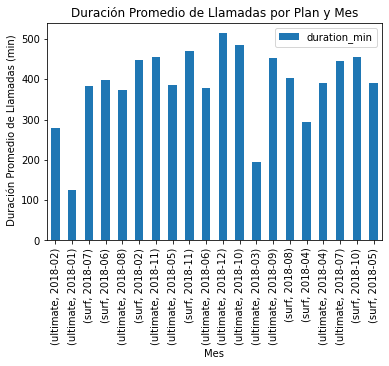

In [100]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
prom_call_duration = df_merged_with_plans.groupby(['plan', 'month'])['duration_min'].mean()
prom_call_duration.sample(20).plot(kind= 'bar',
                        title= 'Duración Promedio de Llamadas por Plan y Mes',
                        xlabel = 'Mes',
                        ylabel= ' Duración Promedio de Llamadas (min)', 
                        legend= True)
plt.show()

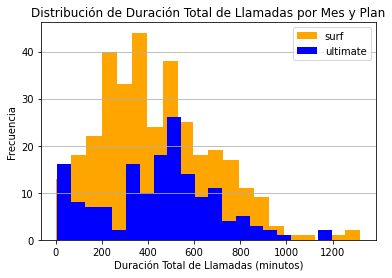

In [101]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_plan = df_merged_with_plans[df_merged_with_plans['plan'] == 'surf']
ultimate_plan = df_merged_with_plans[df_merged_with_plans['plan'] == 'ultimate']
#Gráfico Histograma
surf_plan['duration_min'].plot(kind='hist', bins=20, color='orange', label='surf')
ultimate_plan['duration_min'].plot(kind='hist', bins=20, color='blue', label='ultimate')
plt.title('Distribución de Duración Total de Llamadas por Mes y Plan')
plt.xlabel('Duración Total de Llamadas (minutos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y')

plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [102]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_calls = df_merged_with_plans.groupby('month')['duration_min'].mean()
variance_duration = df_merged_with_plans.groupby('month')['minutes_included'].var()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration_min'>

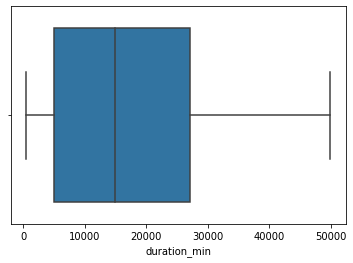

In [103]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
duration_calls = df_merged_with_plans.groupby('month')['duration_min'].sum()
sns.boxplot(duration_calls)

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

1. Definitivamente el comportamiento varía en función al plan, en el Histograma se puede verificar que la frecuencia de llamadas del plan 'surf' es mucho mas alta que la de 'ultimate' y la duración de llamadas es casi la misma.

### Mensajes

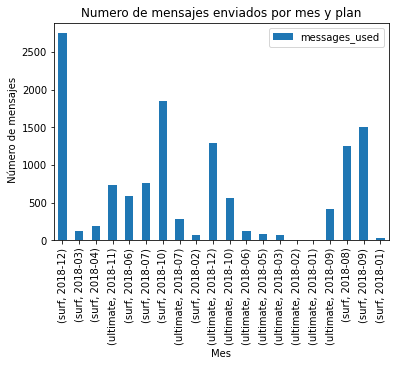

In [104]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
number_mess_month = df_merged_with_plans.groupby(['plan', 'month'])['messages_used'].sum()
number_mess_month.sample(20).plot(kind= 'bar',
                        title= 'Numero de mensajes enviados por mes y plan',
                        xlabel = 'Mes',
                        ylabel= ' Número de mensajes', 
                        legend= True)
plt.show()

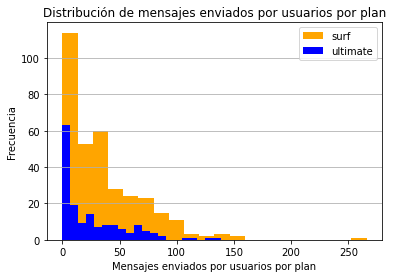

In [105]:
# Compara la cantidad de mensajes enviados por usuarios por plan
surf_plan = df_merged_with_plans[df_merged_with_plans['plan'] == 'surf']
ultimate_plan = df_merged_with_plans[df_merged_with_plans['plan'] == 'ultimate']
#Gráfico Histograma
surf_plan['messages_used'].plot(kind='hist', bins=20, color='orange', label='surf')
ultimate_plan['messages_used'].plot(kind='hist', bins=20, color='blue', label='ultimate')
plt.title('Distribución de mensajes enviados por usuarios por plan')
plt.xlabel('Mensajes enviados por usuarios por plan')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y')

plt.show()

In [106]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mean_internet_user = df_merged_with_plans.groupby(['user_id','plan'])['mb_used'].sum()
# Calculo de la varianza de cantidad de tráfico de Internet consumido por usuarios por plan
variance_duration = df_merged_with_plans.groupby(['user_id','plan'])['mb_used'].var()

In [107]:
# Calculo de la media y la varianza de la cantidad de mensajes enviados por mes.
mean_calls = df_merged_with_plans.groupby('month')['messages_used'].mean()
variance_duration = df_merged_with_plans.groupby('month')['messages_used'].var()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='messages_used'>

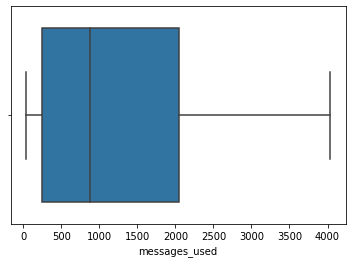

In [108]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de mensajes enviados por mes.
mess_month = df_merged_with_plans.groupby('month')['messages_used'].sum()
sns.boxplot(mess_month)

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

1. El comportamiento de frencuencia de envío de mensajes varía en función al plan, en el Histograma se puede verificar que la frecuencia del envío de mensajes del plan 'surf' es mucho mas alta que la de 'ultimate' y la cantidad de mensajes también es mas alta.

### Internet

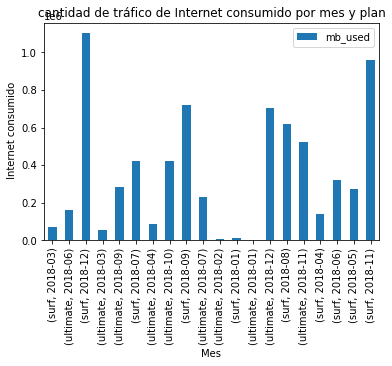

In [109]:
# Comprara la cantidad de tráfico de Internet a consumir cada mes los usuarios de cada plan
number_mess_month = df_merged_with_plans.groupby(['plan', 'month'])['mb_used'].sum()
number_mess_month.sample(20).plot(kind= 'bar',
                        title= 'cantidad de tráfico de Internet consumido por mes y plan',
                        xlabel = 'Mes',
                        ylabel= ' Internet consumido', 
                        legend= True)
plt.show()

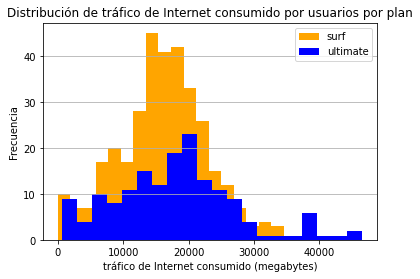

In [110]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
surf_plan = df_merged_with_plans[df_merged_with_plans['plan'] == 'surf']
ultimate_plan = df_merged_with_plans[df_merged_with_plans['plan'] == 'ultimate']
#Gráfico Histograma
surf_plan['mb_used'].plot(kind='hist', bins=20, color='orange', label='surf')
ultimate_plan['mb_used'].plot(kind='hist', bins=20, color='blue', label='ultimate')
plt.title('Distribución de tráfico de Internet consumido por usuarios por plan')
plt.xlabel('tráfico de Internet consumido (megabytes)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y')

plt.show()

In [111]:
# Calculo de la media y la varianza de tráfico de Internet consumido por mes.
mean_calls = df_merged_with_plans.groupby('month')['mb_used'].mean()
variance_duration = df_merged_with_plans.groupby('month')['mb_used'].var()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mb_used'>

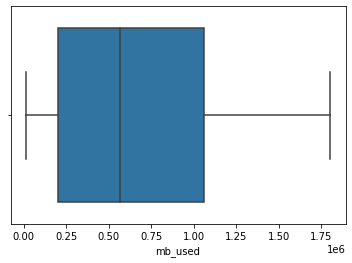

In [112]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de tráfico de Internet consumido por mes.
traffic_internet_month = df_merged_with_plans.groupby('month')['mb_used'].sum()
sns.boxplot(traffic_internet_month)

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

1. El comportamiento de la cantidad de tráfico de internet consumido si varia en función al plan, en el Histograma se puede verificar que la frecuencia de la cantidad de tráfico de internet consumido del plan 'surf' es mucho mas alta que la de 'ultimate' y la cantidad de megabites consumidos es muy parecida.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [113]:
df_merged_with_plans.head()

,user_id_l,plan,plan_name,usd_monthly_pay,mb_per_month_included,gb_per_month_included,messages_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute,user_id,month,duration_min,messages_used,mb_used,total_llamadas,Total_duration
0,1000,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1000,2018-12,133.0,11.0,1901.47,16.0,133.0
1,1006,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-08,200.0,30.0,6919.15,27.0,200.0
2,1008,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-09,346.0,44.0,13314.82,49.0,346.0
3,1011,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-10,439.0,53.0,22330.49,65.0,439.0
4,1013,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-11,468.0,36.0,18504.30,64.0,468.0


In [114]:
#Cálculo de la media de los ingresos mensuales por plan
#1. Primero se debe calcular los ingresos mensuales por usuario creando una nueva columna 'total_income'
#Llamadas
extra_minutes = df_merged_with_plans['duration_min'] - df_merged_with_plans['minutes_included']
# No permitir minutos negativos
extra_minutes = extra_minutes.clip(lower=0)

#Mensajes
extra_messages = df_merged_with_plans['messages_used'] - df_merged_with_plans['messages_included']
# No permitir mensajes negativos
extra_messages = extra_messages.clip(lower=0)

#Internet
extra_internet_gb = np.ceil((df_merged_with_plans['mb_used'] - df_merged_with_plans['gb_per_month_included'] * 1024) / 1024)
# No permitir gigabytes negativos
extra_internet_gb = extra_internet_gb.clip(lower=0)

# Calcular el ingreso adicional por el consumo excedido
extra_minutes_income = extra_minutes * df_merged_with_plans['usd_per_minute']
extra_messages_income = extra_messages * df_merged_with_plans['usd_per_message']
extra_internet_income = extra_internet_gb * df_merged_with_plans['usd_per_gb']

# Calcular el ingreso total mensual
total_income = (df_merged_with_plans['usd_monthly_pay'] + extra_minutes_income + extra_messages_income + extra_internet_income)


In [115]:
# Añadiendo la columna de ingresos al DataFrame
df_merged_with_plans['monthly_income'] = total_income

In [116]:
df_merged_with_plans.head()

,user_id_l,plan,plan_name,usd_monthly_pay,mb_per_month_included,gb_per_month_included,messages_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute,user_id,month,duration_min,messages_used,mb_used,total_llamadas,Total_duration,monthly_income
0,1000,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1000,2018-12,133.0,11.0,1901.47,16.0,133.0,70.0
1,1006,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-08,200.0,30.0,6919.15,27.0,200.0,70.0
2,1008,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-09,346.0,44.0,13314.82,49.0,346.0,70.0
3,1011,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-10,439.0,53.0,22330.49,65.0,439.0,70.0
4,1013,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-11,468.0,36.0,18504.30,64.0,468.0,70.0


In [117]:
#Describiendo los ingresos de los planes
stats_income = df_merged_with_plans.groupby('plan')['monthly_income'].describe()
print(stats_income)

          count       mean        std   min   25%    50%   75%     max
plan                                                                  
surf      339.0  55.191121  45.320653  20.0  20.0  33.53  80.0  251.11
ultimate  161.0  74.695652  17.600797  70.0  70.0  70.00  70.0  182.00


In [118]:
# Calculo de la varianza de los ingresos mensuales por plan
variance_income = df_merged_with_plans.groupby('plan')['monthly_income'].var()
print(variance_income)

plan
surf        2053.961583
ultimate     309.788043
Name: monthly_income, dtype: float64


In [119]:
df_merged_with_plans.head()

,user_id_l,plan,plan_name,usd_monthly_pay,mb_per_month_included,gb_per_month_included,messages_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute,user_id,month,duration_min,messages_used,mb_used,total_llamadas,Total_duration,monthly_income
0,1000,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1000,2018-12,133.0,11.0,1901.47,16.0,133.0,70.0
1,1006,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-08,200.0,30.0,6919.15,27.0,200.0,70.0
2,1008,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-09,346.0,44.0,13314.82,49.0,346.0,70.0
3,1011,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-10,439.0,53.0,22330.49,65.0,439.0,70.0
4,1013,ultimate,ultimate,70,30720,30,1000,3000,7,0.01,0.01,1001,2018-11,468.0,36.0,18504.30,64.0,468.0,70.0


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

1. El plan 'surf' tiene mayor ingresos que el plan 'ultimate', pero debido a que el plan 'ultimate' tiene un costo mayor, la media y los cuartiles son mayores. La desviación estandar muestra una mayor dispersion de los ingresos en 'surf' que en 'ultimate' eso quiere decir que existe un mayor exceso de uso de llamadas, minutos e internet en el plan 'surf'.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [120]:
# Prueba las hipótesis
#Ingresos promedio de usuarios por planes
income_ultimate = df_merged_with_plans[df_merged_with_plans['plan_name'] == 'ultimate']['monthly_income']
income_surf = df_merged_with_plans[df_merged_with_plans['plan_name'] == 'surf']['monthly_income']

alpha = 0.05

results = st.ttest_ind(income_ultimate, income_surf, equal_var=False)

print('valor p: ', results.pvalue)

#Verificación de rechazo de hipótesis nula
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
    

valor p:  1.603045858899209e-11
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [122]:
# Fusionar los dataframes en función de la columna 'user_id_l'
df_merged_plans_user = df_merged_with_plans.merge(df_users, left_on='user_id_l', right_on='user_id')

In [123]:
#Ingresos promedio de usuarios por del área de NY-NJ
ny_nj_income = df_merged_plans_user[df_merged_plans_user['city_area'] == 'New York-Newark-Jersey City']['monthly_income']
other_region_income = df_merged_plans_user[df_merged_plans_user['city_area'] != 'New York-Newark-Jersey City']['monthly_income']

alpha = 0.05

results2 = st.ttest_ind(ny_nj_income, other_region_income, equal_var=False)

print('valor p: ', results2.pvalue)

#Verificación de rechazo de hipótesis nula
if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.4073362379575194
No podemos rechazar la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buen trabajo con el desarrollo de las pruebas de hipótesis
</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1.0 Pude determinar con la prueba nula de hipotesis que los ingresos promedio de cada plan son diferentes.

1.1 Dado que este valor p es mayor que (alfa) de 0.05, no tenemos suficiente evidencia para rechazar la hipótesis nula de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

2. Con respecto al análisis general del proyecto podemos decir que el plan 'surf' tiene mayor frecuencia del uso de llamadas, mensajes e internet que el plan 'ultimate' ya que es un plan con menos beneficios los usuarios terminan pagando un extra por el uso en exceso del plan original. 

3. La manera en que analicé el proyecto fue agrupando los datasets obteniendo la media, graficos de histogramas y de barras de cada usurario por mes para verificar el uso y frecuencia de sus planes, esto determinó que plan tiene mayores excesos que otro.



<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, así como juntar la información. Además, considero que el análisis con las gráficas y con las pruebas de hipótesis es muy acertado. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Realizar un análisis inicial de registros duplicados en todas las bases de datos
    
    
*  verificar que redondeamos las variables antes de hacer la agrupación por usuario
    
*  verificar que hacemos la transformación de megabytes a gigabytes
    
*  Cuando hacemos la agrupación de los datos, considerar agregar la variable de mes para que los análisis posteriores sean más sencillos e intuitivos de realizar

</div>